In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
(x_train,x_test) = x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

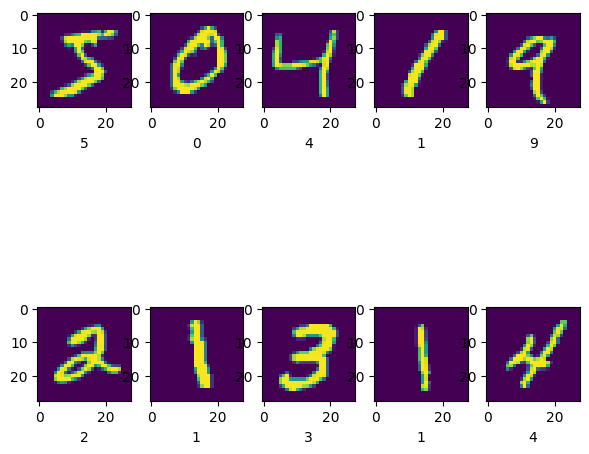

In [5]:
plt.figure(figsize=(7,7))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks()
  plt.yticks()
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
history = model.fit(x_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
1688/1688 [==============================] - 54s 31ms/step - loss: 2.3272 - accuracy: 0.1859 - val_loss: 2.3026 - val_accuracy: 0.1782
Epoch 2/5
1688/1688 [==============================] - 42s 25ms/step - loss: 2.3026 - accuracy: 0.1854 - val_loss: 2.3026 - val_accuracy: 0.1782
Epoch 3/5
1688/1688 [==============================] - 43s 25ms/step - loss: 2.3026 - accuracy: 0.1854 - val_loss: 2.3026 - val_accuracy: 0.1782
Epoch 4/5
1688/1688 [==============================] - 45s 26ms/step - loss: 2.3026 - accuracy: 0.1854 - val_loss: 2.3026 - val_accuracy: 0.1782
Epoch 5/5
1688/1688 [==============================] - 49s 29ms/step - loss: 2.3026 - accuracy: 0.1854 - val_loss: 2.3026 - val_accuracy: 0.1782


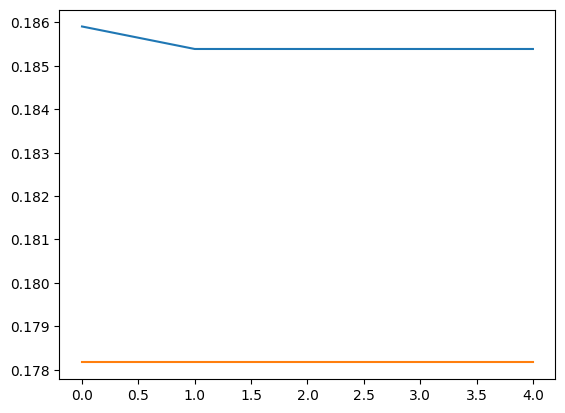

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

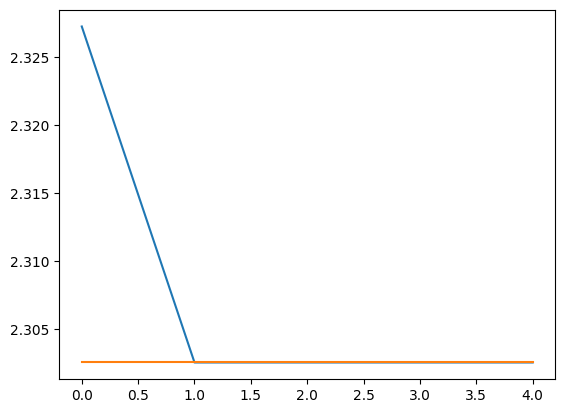

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [15]:
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [16]:
import numpy as np
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([1, 0, 1, ..., 0, 0, 0])

In [17]:
y_pred1[1]

0

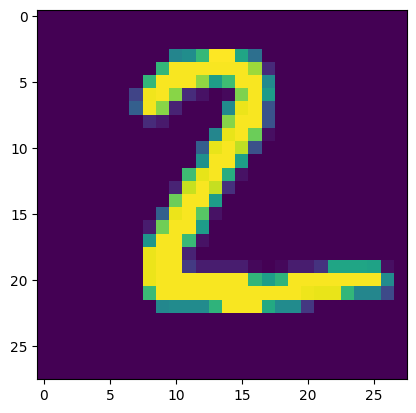

In [18]:
plt.imshow(x_test[1])

In [20]:
class_names[y_test[1]]

'2'